# Deep Learning with Python - Chapter 2
### A First Look at a Neural Network

In [4]:
# Listing the MNIST dataest in Keras
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [11]:
# The compilations step
network.compile(optimizer='rmsprop', loss='categorical_crossentropy',
               metrics=['accuracy'])

Before training, we’ll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval. Previously, our train- ing images, for instance, were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

In [12]:
# Viewing train images
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ..., 
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, 

In [13]:
# Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32')/ 255

In [14]:
# Viewing the reshaped training data
train_images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [15]:
# View the training labels
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
# Preparing the labels
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
train_labels

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [18]:
# Fit the network with training data
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.2550 - acc: 0.9268
Epoch 2/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.1027 - acc: 0.9699
Epoch 3/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0686 - acc: 0.9793
Epoch 4/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.0497 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.0371 - acc: 0.9891


In [19]:
# Testing the network on the testing data
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc', test_acc)

10000/10000 [==============================] - 0s 37us/step
test_acc 0.9779


### A Data Representations for Neural Networks

In [20]:
# A Numpy Scalar ( 0D tensor)
import numpy as np
x = np.array(12)
x

array(12)

In [21]:
x.ndim # ndim meausure the numer of dimension in a tensor

0

In [22]:
# A vector (1D tensor)
x = np.array([12,3,6,14])
x

array([12,  3,  6, 14])

In [23]:
x.ndim

1

In [24]:
# Matrices (2D Tensors)
x = np.array([[5, 78, 2, 34, 0],
                  [6, 79, 3, 35, 1],
                  [7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [25]:
x.ndim

2

In [26]:
# 3D Tensor and higher dimensional Tensors
x = np.array([[[[5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1], 
                [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]]]])
x

array([[[[ 5, 78,  2, 34,  0],
         [ 6, 79,  3, 35,  1],
         [ 7, 80,  4, 36,  2]],

        [[ 5, 78,  2, 34,  0],
         [ 6, 79,  3, 35,  1],
         [ 7, 80,  4, 36,  2]],

        [[ 5, 78,  2, 34,  0],
         [ 6, 79,  3, 35,  1],
         [ 7, 80,  4, 36,  2]]]])

In [27]:
# Back to the MNIST Example
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [28]:
# Dimensions of the data
print(train_images.ndim)

3


In [29]:
# Data type of the data
print(train_images.dtype)

uint8


So what we have here is a 3D tensor of 8-bit integers. More precisely, it’s an array of 60,000 matrices of 28 × 8 integers. Each such matrix is a grayscale image, with coeffi- cients between 0 and 255

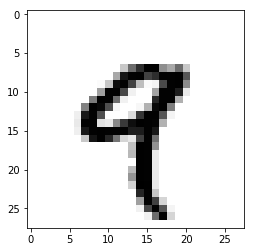

In [30]:
# Displaying the fourth digit
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In the previous example, we selected a specific digit alongside the first axis using the syntax train_images[i]. Selecting specific elements in a tensor is called tensor slicing. Let’s look at the tensor-slicing operations you can do on Numpy arrays. 

In [31]:
# Manipulating Tensors in Numpy
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


It’s equivalent to this more detailed notation, which specifies a start index and stop index for the slice along each tensor axis. Note that : is equivalent to selecting the entire axis:

In [32]:
# Equivalent 1
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)


In [33]:
# Equivalent 2
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)


In [34]:
# Select 14 x 14 pixels in the bottom-right corner of all images
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)


In [35]:
# Select the 7 x 7 pixels centered in the middle
my_slice = train_images[: 7:-7, 7:-7]

In [36]:
# A 128 batch of the data
batch = train_images[:128]

In [37]:
# The next batch of the data
batch = train_images[128:256]

In [38]:
# the n-th training batch
n = 10
batch = train_images[128 * n:128 * (n+1)]

In [39]:
# Tensor Operation (Dense)
keras.layers.Dense(512, activation='relu')

NameError: name 'keras' is not defined

This layer can be interpreted as a function, which takes as input a 2D tensor and returns another 2D tensor—a new representation for the input tensor. Specifically, the function is as follows (where W is a 2D tensor and b is a vector, both attributes of the layer):


The relu operation and addition are element-wise operations: operations that are applied independently to each entry in the tensors being considered. This means these operations are highly amenable to massively parallel implementations (vectorized implementations, a term that comes from the vector processor supercomputer archi- tecture from the 1970–1990 period). If you want to write a naive Python imple- mentation of an element-wise operation, you use a for loop, as in this naive implementation of an element-wise relu operation:

In [ ]:
# Element wise relu operation
def naive_relu(x):
    assert len(x.shape) == 2
    
    x = x.copy()
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j], 0)
    return x

You can do the same for addition

In [ ]:
def naive_add(x,y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i,j]
        return x

In [ ]:
# In numpy you can do the following element-wirse operation, 
# and it will be blazing fast
import numpy as np

n = np.array([[5, 78, 2, 34, 0],
                  [6, 79, 3, 35, 1],
                  [7, 80, 4, 36, 2]])

y = np.array([[5, 78, 2, 34, 0],
                  [6, 79, 3, 35, 1],
                  [7, 80, 4, 36, 2]])
z = x+y

In [ ]:
%%timeit
z = x+y

In [ ]:
%%timeit
zw = np.maximum(z, 0)

In [ ]:
# tensor operations with broadcasting
def naive_add_matrix_and_vectoring(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[j]

In [ ]:
# Element wise operatio on two tensor of different shapes via broadcasting
import numpy as np

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

z = np.maximum(x,y)

The dot operation, also called a tensor product (not to be confused with an element- wise product) is the most common, most useful tensor operation. Contrary to element-wise operations, it combines entries in the input tensors.

Mathematically, what does the dot operation do? Let’s start with the dot product of two vectors x and y. It’s computed as follows:

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0 
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

You’ll have noticed that the dot product between two vectors is a scalar and that only vectors with the same number of elements are compatible for a dot product.
You can also take the dot product between a matrix x and a vector y, which returns a vector where the coefficients are the dot products between y and the rows of x. You implement it as follows:

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i] += x[i,j] * y[j]
    return z

In [ ]:
# the naive dot implementation, when tensor.ndim is > 1
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
        return x

A third type of tensor operation that’s essential to understand is tensor reshaping. Although it wasn’t used in the Dense layers in our first neural network example, we used it when we preprocessed the digits data before feeding it into our network

In [ ]:
# Tensor reshaping
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
print(x)

In [ ]:
x = x.reshape((6,1))
x

In [ ]:
x = x.reshape((2,3))
x

A special case of reshaping that’s commonly encountered is transposition. Transposing a matrix means exchanging its rows and its columns, so that x[i, :] becomes x[:, i]

In [ ]:
# Transposing a tensor
x = np.zeros((300,20))
x

In [ ]:
x = np.transpose(x)
print(x.shape)

In [ ]:
# momentum in gradient descent boosting

#past_velocity = 0
#momentum = 0.1
#while loss > 0.1:
#    w, loss , gradient = get_current_parameters()
#    velocity = past_velocity * momentum + learning_rate * gradient
#    w = w + momentum * velocity - learning_rate * gradient
#    past_velocity = velocity
#    update_parameter(w)

In [63]:
# Looking back to our first example
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Fix: This code was missing from the keras Chapter 2 example.
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Now you understand that this network consists of a chain of two Dense layers, that each layer applies a few simple tensor operations to the input data, and that these operations involve weight tensors. Weight tensors, which are attributes of the layers, are where the knowledge of the network persists.

In [64]:
# categorical crossentropy is the loss functions
# the exact rules governing a specific use of gradient decents are
# defined by the rmsprop optimizer
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [65]:
train_images.shape

(60000, 784)

In [66]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.2518 - acc: 0.9285
Epoch 2/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.1037 - acc: 0.9696
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0683 - acc: 0.9796
Epoch 4/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.0496 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.0370 - acc: 0.9887
